In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("dsjobs_version3_cleaned.csv")

In [3]:
#New line of code to correct a specific float attribute error in Job Description {AttributeError: 'float' object has no attribute 'lower'}
df['Job Description'] = df['Job Description'].astype(str) 

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,"₹ 9,06,841",Functional Analytics Lead\n\nJob details:\nWor...,3.8,Capgemini\n3.8,Bengaluru,"Paris, France",10000+ employees,1967,Company - Public,...,906841.0,Capgemini\n,Bengaluru,0,53,1,1,1,0,0
1,Data Scientist,₹221K - ₹238K,Provide analytical insights into emerging prob...,3.4,PayPal\n3.4,Bengaluru,"San Jose, CA",10000+ employees,1998,Company - Public,...,229.5,PayPal\n,Bengaluru,0,22,1,1,0,0,0
2,Data Scientist,"₹ 25,38,462",Description\n\nSHIFT: Day Job\n\nSCHEDULE:\n\n...,3.6,Oracle\n3.6,Hyderabad,"Redwood City, CA",10000+ employees,1977,Company - Public,...,2538462.0,Oracle\n,Hyderabad,0,43,1,1,0,0,0
3,Data Scientist,"₹ 15,66,457","At Amazon, we strive to be most customer-centr...",4.2,Amazon\n4.2,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,...,1566457.0,Amazon\n,Hyderabad,0,26,1,1,1,1,1
4,Data Scientist,"₹ 10,83,817",nan,3.9,Accenture\n3.9,Mumbai,"Dublin, Ireland",10000+ employees,1989,Company - Public,...,1083817.0,Accenture\n,Mumbai,0,31,0,0,0,0,0


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'monthly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn'],
      dtype='object')

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title 

In [7]:
 df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [8]:
df.job_simp.value_counts()

data scientist    338
Name: job_simp, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        230
senior    107
jr          1
Name: seniority, dtype: int64

In [10]:
#Fixing state names if any of them are faulty
#df['job_state']=df.hq_country.apply(lambda x: x.strip() if x.strip().lower()!= 'los angeles' else 'CA')
df.job_state.value_counts()

Bengaluru             139
Hyderabad              41
Mumbai                 41
Pune                   34
India                  22
Chennai                17
Gurgaon                11
New Delhi               8
Dhaka                   6
Noida                   4
Ahmedabad               2
Chandigarh              2
Maharashtra             1
Thiruvananthapuram      1
Ernakulam               1
Neem-Ka-Thana           1
Bhubaneswar             1
Coimbatore              1
Surat                   1
Andhra Pradesh          1
Kozhikode               1
Indore                  1
Kochi                   1
Name: job_state, dtype: int64

In [11]:
#Job description length
df['descr_length']=df['Job Description'].apply(lambda x: len(x))

#New line of code to correct a specific float attribute error in Job Description {AttributeError: 'float' object has no attribute 'lower'}
df['descr_length']

0      2462
1      1452
2      1777
3      4616
4         3
       ... 
333    1845
334    3589
335    5094
336    4355
337    2019
Name: descr_length, Length: 338, dtype: int64

In [12]:
#Competitor Count - Finding the number of competitors by separating the text using commas and making -1 as 0
df['comp_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

In [13]:
df['comp_count']

0      3
1      3
2      3
3      3
4      3
      ..
333    0
334    0
335    0
336    0
337    0
Name: comp_count, Length: 338, dtype: int64

In [14]:
#Monthly wage to Annual
df['min_salary'] = df.apply(lambda x: x.min_salary*12 if x.monthly == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*12 if x.monthly == 1 else x.max_salary, axis=1)
#Before executing this remember to create the hourly column from previous tutorial 3

In [15]:
#Remove new line character from Job title (removing "\n")
df.company_txt

0                     Capgemini\n
1                        PayPal\n
2                        Oracle\n
3                        Amazon\n
4                     Accenture\n
                  ...            
333                 TCG Digital\n
334         Egnify Technologies\n
335                      CIMMYT\n
336    MatchMove Global Pte Ltd\n
337        Golden Opportunities\n
Name: company_txt, Length: 338, dtype: object

In [16]:
df['company_txt'] = df['company_txt'].apply(lambda x:x.replace('\n',''))

In [17]:
df['company_txt'] #Here you can see that the "\n" is removed from the fields

0                     Capgemini
1                        PayPal
2                        Oracle
3                        Amazon
4                     Accenture
                 ...           
333                 TCG Digital
334         Egnify Technologies
335                      CIMMYT
336    MatchMove Global Pte Ltd
337        Golden Opportunities
Name: company_txt, Length: 338, dtype: object

In [18]:
df.describe()

,Rating,Founded,monthly,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,descr_length,comp_count
count,338.000000,338.000000,338.000000,3.380000e+02,3.380000e+02,3.380000e+02,338.0,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,3.723964,1484.068047,0.073964,5.209772e+05,5.210343e+05,4.994538e+05,0.0,21.458580,0.795858,0.994083,0.325444,0.215976,0.420118,2832.985207,0.857988
std,0.772556,869.437411,0.262101,6.598129e+05,6.597678e+05,6.669771e+05,0.0,34.855783,0.403671,0.076809,0.469235,0.412108,0.494309,1672.322911,1.297319
min,-1.000000,-1.000000,0.000000,5.000000e+00,6.000000e+00,5.500000e+00,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,3.500000,-1.000000,0.000000,4.680000e+02,5.010000e+02,4.830000e+02,0.0,-1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1643.500000,0.000000
50%,3.800000,1996.000000,0.000000,2.238720e+05,2.238720e+05,1.865600e+04,0.0,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2469.000000,0.000000
75%,4.100000,2010.000000,0.000000,9.095380e+05,9.095380e+05,9.008635e+05,0.0,24.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4002.000000,2.000000
max,5.000000,2018.000000,1.000000,3.278146e+06,3.278146e+06,3.278146e+06,0.0,184.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9852.000000,3.000000


In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'monthly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'descr_length',
       'comp_count'],
      dtype='object')

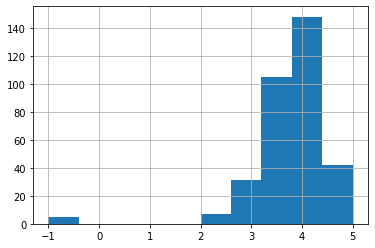

In [20]:
df.Rating.hist()

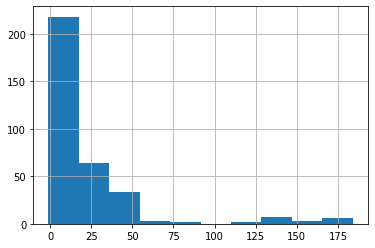

In [21]:
df.age.hist()

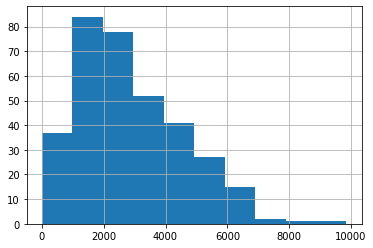

In [22]:
df.descr_length.hist()

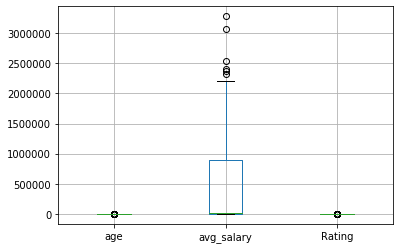

In [23]:
df.boxplot(column = ['age','avg_salary','Rating']) #add avg_salary in middle

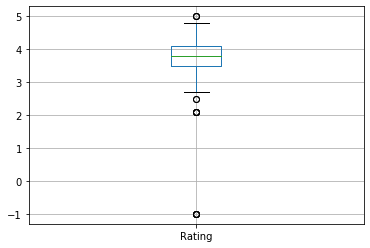

In [24]:
df.boxplot(column = ['Rating'])

In [25]:
#Correlation Plot 
df[['age','avg_salary','Rating','descr_length']].corr()

,age,avg_salary,Rating,descr_length
age,1.000000,0.230435,0.064298,0.205969
avg_salary,0.230435,1.000000,0.146376,-0.020293
Rating,0.064298,0.146376,1.000000,-0.036913
descr_length,0.205969,-0.020293,-0.036913,1.000000


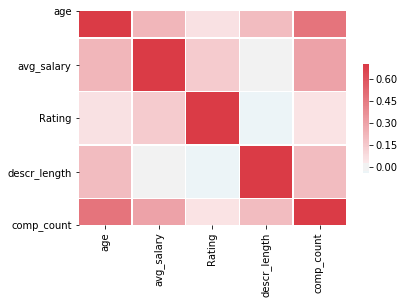

In [26]:
#Corr Plot using Seaborn is visually more appealing
#Making the plot more clear the below 1 line is used
cmap = sns.diverging_palette(220,10, as_cmap=True)
#Plotting
sns.heatmap(df[['age','avg_salary','Rating','descr_length','comp_count']].corr(),vmax=.7,center=0,cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'monthly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'descr_length',
       'comp_count'],
      dtype='object')

In [28]:
#Picking out only the Categorical data from the columns
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue',
             'min_salary', 'max_salary', 'avg_salary','company_txt','job_state',
             'same_state','python_yn', 'R_yn','spark_yn', 'aws_yn',
             'excel_yn', 'job_simp', 'seniority']]

Graph for Location:total = 23


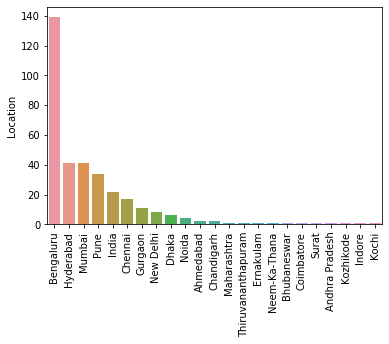

Graph for Headquarters:total = 102


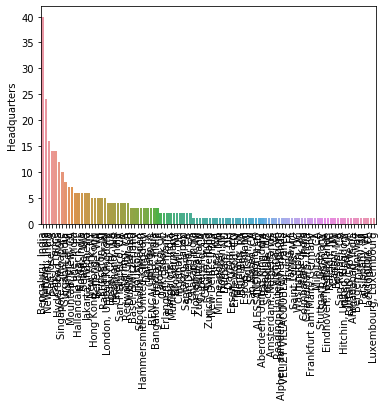

Graph for Size:total = 8


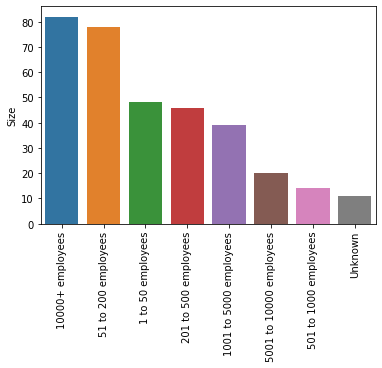

Graph for Type of ownership:total = 7


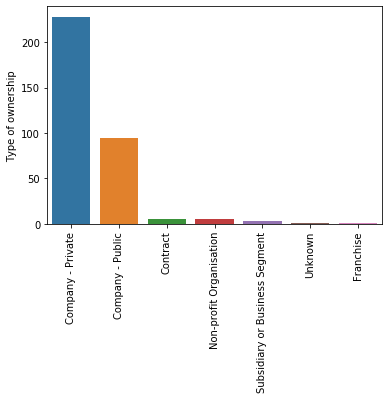

Graph for Industry:total = 41


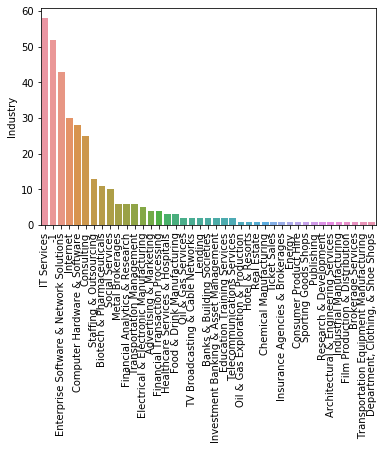

Graph for Sector:total = 20


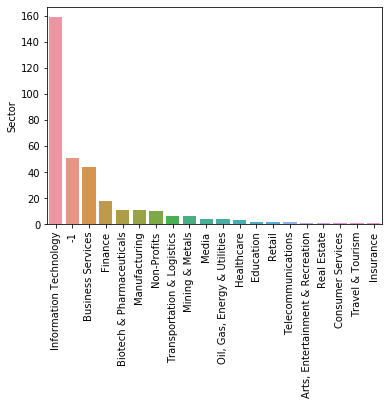

Graph for Revenue:total = 11


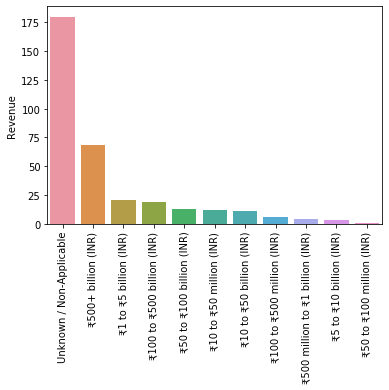

Graph for min_salary:total = 210


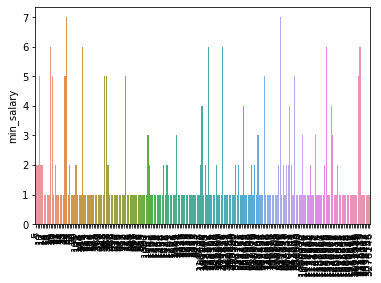

Graph for max_salary:total = 215


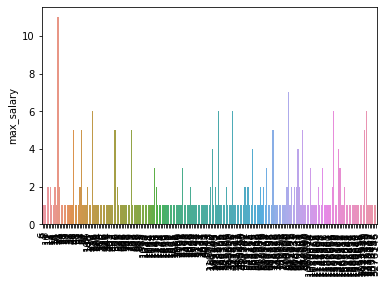

Graph for avg_salary:total = 218


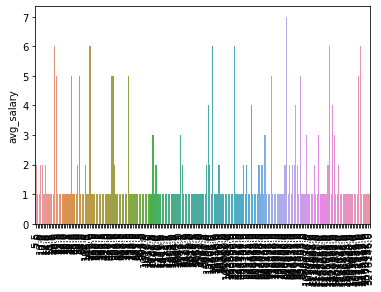

Graph for company_txt:total = 209


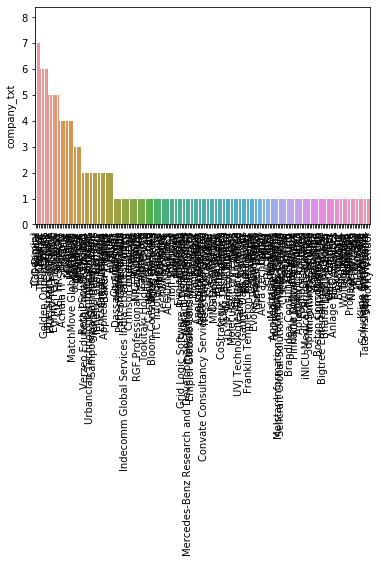

Graph for job_state:total = 23


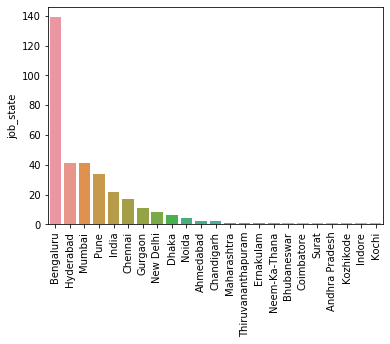

Graph for same_state:total = 1


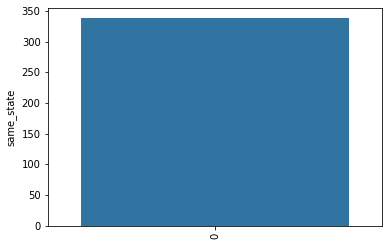

Graph for python_yn:total = 2


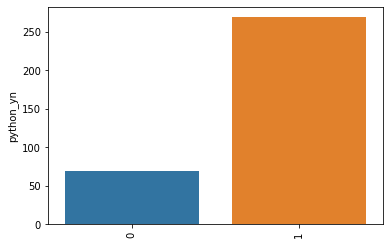

Graph for R_yn:total = 2


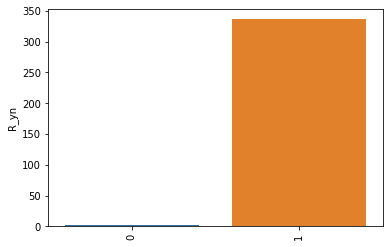

Graph for spark_yn:total = 2


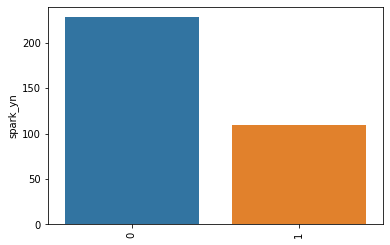

Graph for aws_yn:total = 2


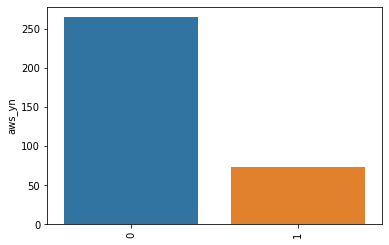

Graph for excel_yn:total = 2


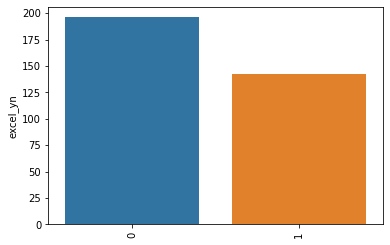

Graph for job_simp:total = 1


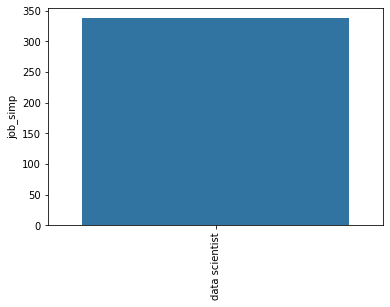

Graph for seniority:total = 3


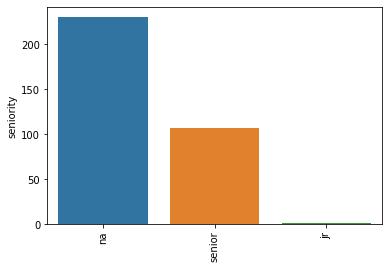

In [29]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s:total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location:total = 5


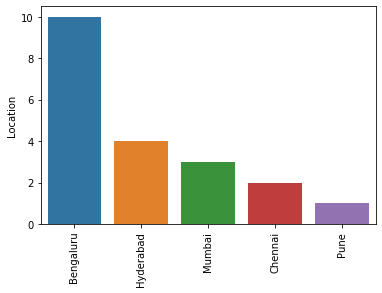

Graph for avg_salary:total = 20


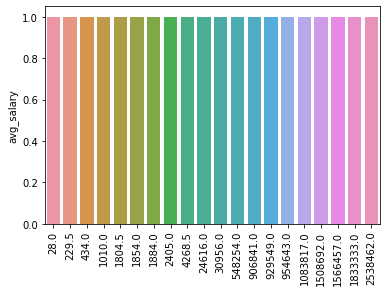

Graph for Headquarters:total = 20


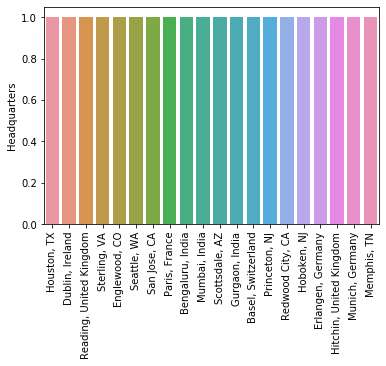

Graph for company_txt:total = 20


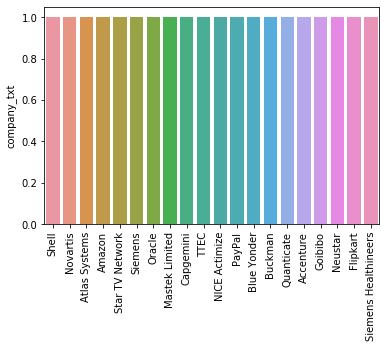

In [30]:
for i in df_cat[['Location','avg_salary','Headquarters','company_txt']].columns: #Picking only three fields which we want to focus
    cat_num = df_cat[i][:20].value_counts() #Taking only top 20 stats
    print("Graph for %s:total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()


In [31]:
#Use this to plot salary observations when you create avg_salary
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority               
data scientist jr           1524.500000
               na         448973.956522
               senior     612615.336449

In [32]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [33]:
pd.pivot_table(df, index='job_state', values='avg_salary', aggfunc='count').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
Bengaluru,139
Hyderabad,41
Mumbai,41
Pune,34
India,22
Chennai,17
Gurgaon,11
New Delhi,8
Dhaka,6


In [34]:
#Filtering the data based only for 'Data Scientists' #By definition it sorts by the avg_salary
pd.pivot_table(df[df.job_simp == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)


,avg_salary
job_state,
Neem-Ka-Thana,1.131995e+06
Ahmedabad,6.282630e+05
Bengaluru,6.080621e+05
Gurgaon,5.712408e+05
Pune,5.711799e+05
Noida,5.648609e+05
Hyderabad,5.597862e+05
Mumbai,4.396269e+05
Chennai,4.164646e+05


In [35]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'comp_count', 'monthly', 
           #'employer_provided', 
            'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'descr_length', 'Type of ownership','avg_salary'
            ]]



In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'monthly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'descr_length',
       'comp_count'],
      dtype='object')

In [37]:
#To see which industry pays more
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
          avg_salary
Rating              
 4.8    2.022989e+06
 4.1    1.173821e+06
 4.7    1.122813e+06
 2.7    7.941080e+05
 3.6    6.905878e+05
 2.8    6.801054e+05
 3.4    6.792242e+05
 3.7    5.848383e+05
 3.8    5.789386e+05
 4.2    5.599828e+05
 2.9    4.938918e+05
 4.3    4.728649e+05
 4.0    3.970214e+05
 3.9    3.531425e+05
 3.1    2.984426e+05
 3.2    2.367990e+05
 3.5    2.080370e+05
 4.5    1.666655e+05
 4.4    8.258067e+04
 3.3    7.548483e+04
 3.0    2.268454e+04
 4.6    1.472919e+04
-1.0    1.669200e+03
 2.5    3.315000e+02
 5.0    2.026667e+02
 2.1    4.400000e+01
Industry
                                           avg_salary
Industry                                             
Insurance Agencies & Brokerages          2.315789e+06
TV Broadcasting & Cable Networks         2.291614e+06
Transportation Management                2.213415e+06
Real Estate                              1.462332e+06
Transportation Equipment Manufacturing   1.305756e+06
Food & Drink Manuf

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
#Seeing big-small companies hiring data scientists
pd.pivot_table(df_pivots, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

In [134]:
#Downloading all the packages to use the nltk package completely
# import nltk
#Below line to download all the packages of nltk
#nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloadin

[nltk_data]    | Downloading package senseval to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/senseval.zip.
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/sentiwordnet.zip.
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/sentence_polarity.zip.
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/shakespeare.zip.
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/sinica_treebank.zip.
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/smultron.zip.
[nltk_data]    | Downloading package

True

In [45]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [145]:
#nltk.download('tokenize')

[nltk_data] Error loading token_size: Package 'token_size' not found
[nltk_data]     in index


False

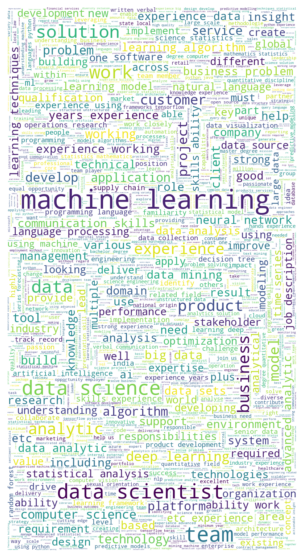

In [46]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Converting the decimal precision to 2 for viewing

In [38]:
pd.options.display.float_format = '{:.2f}'.format
df.avg_salary

0      906841.00
1         229.50
2     2538462.00
3     1566457.00
4     1083817.00
5         434.00
6        1804.50
7        4268.50
8     1508692.00
9        1010.00
10       2405.00
11       1884.00
12      24616.00
13      30956.00
14         28.00
15     929549.00
16       1854.00
17     954643.00
18     548254.00
19    1833333.00
20     825001.00
21        925.50
22         82.50
23     906841.00
24       1091.50
25       5487.50
26     636842.00
27        510.50
28    2400002.00
29       9231.00
30        104.50
31     929549.00
32     617978.00
33     800000.00
34       1250.00
35    1690680.00
36         15.50
37     986711.00
38         35.50
39      15764.00
40        470.00
41       1997.50
42    2022989.00
43         14.00
44       2829.00
45    1010870.00
46       1493.50
47    1124188.00
48    1517242.00
49       1916.50
50    1149826.00
51        745.50
52       2743.50
53     882931.00
54        335.50
55     181443.00
56       2311.00
57        999.00
58      39965.

Code to view the full data + slider enabled

In [39]:
pd.options.display.max_columns = None
display(df)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,monthly,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,descr_length,comp_count
0,Data Scientist,"₹ 9,06,841",Functional Analytics Lead\n\nJob details:\nWor...,3.80,Capgemini\n3.8,Bengaluru,"Paris, France",10000+ employees,1967,Company - Public,Enterprise Software & Network Solutions,Information Technology,₹500+ billion (INR),"Accenture, CGI, Sopra Steria",0,906841,906841,906841.00,Capgemini,Bengaluru,0,53,1,1,1,0,0,data scientist,na,2462,3
1,Data Scientist,₹221K - ₹238K,Provide analytical insights into emerging prob...,3.40,PayPal\n3.4,Bengaluru,"San Jose, CA",10000+ employees,1998,Company - Public,Internet,Information Technology,₹500+ billion (INR),"Square, Amazon, Apple",0,221,238,229.50,PayPal,Bengaluru,0,22,1,1,0,0,0,data scientist,na,1452,3
2,Data Scientist,"₹ 25,38,462",Description\n\nSHIFT: Day Job\n\nSCHEDULE:\n\n...,3.60,Oracle\n3.6,Hyderabad,"Redwood City, CA",10000+ employees,1977,Company - Public,Enterprise Software & Network Solutions,Information Technology,₹500+ billion (INR),"SAP, Salesforce, Microsoft",0,2538462,2538462,2538462.00,Oracle,Hyderabad,0,43,1,1,0,0,0,data scientist,na,1777,3
3,Data Scientist,"₹ 15,66,457","At Amazon, we strive to be most customer-centr...",4.20,Amazon\n4.2,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,Internet,Information Technology,₹500+ billion (INR),"Google, Microsoft, Walmart",0,1566457,1566457,1566457.00,Amazon,Hyderabad,0,26,1,1,1,1,1,data scientist,na,4616,3
4,Data Scientist,"₹ 10,83,817",nan,3.90,Accenture\n3.9,Mumbai,"Dublin, Ireland",10000+ employees,1989,Company - Public,Consulting,Business Services,₹500+ billion (INR),"Cognizant Technology Solutions, EY, McKinsey &...",0,1083817,1083817,1083817.00,Accenture,Mumbai,0,31,0,0,0,0,0,data scientist,na,3,3
5,Data Scientist,₹417K - ₹451K,Overview\n\n\nWe have an exciting opportunity ...,4.00,Quanticate\n4.0,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹1 to ₹5 billion (INR),"GCE Solutions, Parexel, IQVIA",0,417,451,434.00,Quanticate,Bengaluru,0,25,1,1,0,0,0,data scientist,na,2405,3
6,Data Scientist,"₹1,744K - ₹1,865K",What You Should Expect\n\nTo ride the wave of ...,4.30,Blue Yonder\n4.3,Bengaluru,"Scottsdale, AZ",5001 to 10000 employees,1985,Company - Private,Enterprise Software & Network Solutions,Information Technology,₹100 to ₹500 billion (INR),"SAP, Oracle, Manhattan Associates",0,1744,1865,1804.50,Blue Yonder,Bengaluru,0,35,0,1,0,0,0,data scientist,na,1460,3
7,Data Scientist,"₹4,057K - ₹4,480K",Job Title\nData Scientist\n\n20-Jan-2020\n\nNo...,4.00,Shell\n4.0,Chennai,"Houston, TX",10000+ employees,1907,Company - Public,Oil & Gas Exploration & Production,"Oil, Gas, Energy & Utilities",₹500+ billion (INR),"ExxonMobil, BP, Chevron",0,4057,4480,4268.50,Shell,Chennai,0,113,1,1,1,0,1,data scientist,na,7129,3
8,Data Scientist,"₹ 15,08,692",OVERVIEW OF THE COMPANY\n\nStarStar India has ...,3.90,Star TV Network\n3.9,Mumbai,"Mumbai, India",1001 to 5000 employees,1991,Company - Private,TV Broadcasting & Cable Networks,Media,Unknown / Non-Applicable,-1,0,1508692,1508692,1508692.00,Star TV Network,Mumbai,0,29,1,1,0,0,1,data scientist,na,3665,0
9,Data Scientist,"₹936K - ₹1,084K",Position Title\nData Scientist\n\n02-Apr-2020\...,3.90,Novartis\n3.9,Hyderabad,"Basel, Switzerland",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,₹500+ billion (INR),-1,0,936,1084,1010.00,Novartis,Hyderabad,0,24,1,1,0,0,1,data scientist,na,3649,0


In [47]:
df.to_csv("/Users/jagannathan/Documents/ds_salary_proj/eda_data_version3.csv")

In [48]:
newdf = pd.read_csv("/Users/jagannathan/Documents/ds_salary_proj/eda_data_version3.csv")

In [49]:
newdf.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,monthly,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,descr_length,comp_count
0,0,Data Scientist,"₹ 9,06,841",Functional Analytics Lead\n\nJob details:\nWor...,3.80,Capgemini\n3.8,Bengaluru,"Paris, France",10000+ employees,1967,Company - Public,Enterprise Software & Network Solutions,Information Technology,₹500+ billion (INR),"Accenture, CGI, Sopra Steria",0,906841,906841,906841.00,Capgemini,Bengaluru,0,53,1,1,1,0,0,data scientist,na,2462,3
1,1,Data Scientist,₹221K - ₹238K,Provide analytical insights into emerging prob...,3.40,PayPal\n3.4,Bengaluru,"San Jose, CA",10000+ employees,1998,Company - Public,Internet,Information Technology,₹500+ billion (INR),"Square, Amazon, Apple",0,221,238,229.50,PayPal,Bengaluru,0,22,1,1,0,0,0,data scientist,na,1452,3
2,2,Data Scientist,"₹ 25,38,462",Description\n\nSHIFT: Day Job\n\nSCHEDULE:\n\n...,3.60,Oracle\n3.6,Hyderabad,"Redwood City, CA",10000+ employees,1977,Company - Public,Enterprise Software & Network Solutions,Information Technology,₹500+ billion (INR),"SAP, Salesforce, Microsoft",0,2538462,2538462,2538462.00,Oracle,Hyderabad,0,43,1,1,0,0,0,data scientist,na,1777,3
3,3,Data Scientist,"₹ 15,66,457","At Amazon, we strive to be most customer-centr...",4.20,Amazon\n4.2,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,Internet,Information Technology,₹500+ billion (INR),"Google, Microsoft, Walmart",0,1566457,1566457,1566457.00,Amazon,Hyderabad,0,26,1,1,1,1,1,data scientist,na,4616,3
4,4,Data Scientist,"₹ 10,83,817",NaN,3.90,Accenture\n3.9,Mumbai,"Dublin, Ireland",10000+ employees,1989,Company - Public,Consulting,Business Services,₹500+ billion (INR),"Cognizant Technology Solutions, EY, McKinsey &...",0,1083817,1083817,1083817.00,Accenture,Mumbai,0,31,0,0,0,0,0,data scientist,na,3,3


In [46]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,monthly,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,descr_length,comp_count
0,Data Scientist,"₹ 9,06,841",Functional Analytics Lead\n\nJob details:\nWor...,3.80,Capgemini\n3.8,Bengaluru,"Paris, France",10000+ employees,1967,Company - Public,Enterprise Software & Network Solutions,Information Technology,₹500+ billion (INR),"Accenture, CGI, Sopra Steria",0,906841,906841,906841.00,Capgemini,Bengaluru,0,53,1,1,1,0,0,data scientist,na,2462,3
1,Data Scientist,₹221K - ₹238K,Provide analytical insights into emerging prob...,3.40,PayPal\n3.4,Bengaluru,"San Jose, CA",10000+ employees,1998,Company - Public,Internet,Information Technology,₹500+ billion (INR),"Square, Amazon, Apple",0,221,238,229.50,PayPal,Bengaluru,0,22,1,1,0,0,0,data scientist,na,1452,3
2,Data Scientist,"₹ 25,38,462",Description\n\nSHIFT: Day Job\n\nSCHEDULE:\n\n...,3.60,Oracle\n3.6,Hyderabad,"Redwood City, CA",10000+ employees,1977,Company - Public,Enterprise Software & Network Solutions,Information Technology,₹500+ billion (INR),"SAP, Salesforce, Microsoft",0,2538462,2538462,2538462.00,Oracle,Hyderabad,0,43,1,1,0,0,0,data scientist,na,1777,3
3,Data Scientist,"₹ 15,66,457","At Amazon, we strive to be most customer-centr...",4.20,Amazon\n4.2,Hyderabad,"Seattle, WA",10000+ employees,1994,Company - Public,Internet,Information Technology,₹500+ billion (INR),"Google, Microsoft, Walmart",0,1566457,1566457,1566457.00,Amazon,Hyderabad,0,26,1,1,1,1,1,data scientist,na,4616,3
4,Data Scientist,"₹ 10,83,817",nan,3.90,Accenture\n3.9,Mumbai,"Dublin, Ireland",10000+ employees,1989,Company - Public,Consulting,Business Services,₹500+ billion (INR),"Cognizant Technology Solutions, EY, McKinsey &...",0,1083817,1083817,1083817.00,Accenture,Mumbai,0,31,0,0,0,0,0,data scientist,na,3,3


In [43]:
#Removing unnecessary columns from Ken Jee's video(Unnamed: 0)/ The column is already not present here. So, I have deleted an erroneous column 'job_state'
#df_out = df.drop(['job_state'], axis=1)
#df_out.columns

#df_out = df.drop(['Unnamed: 0'], axis =1)

KeyError: "['Unnamed: 0'] not found in axis"